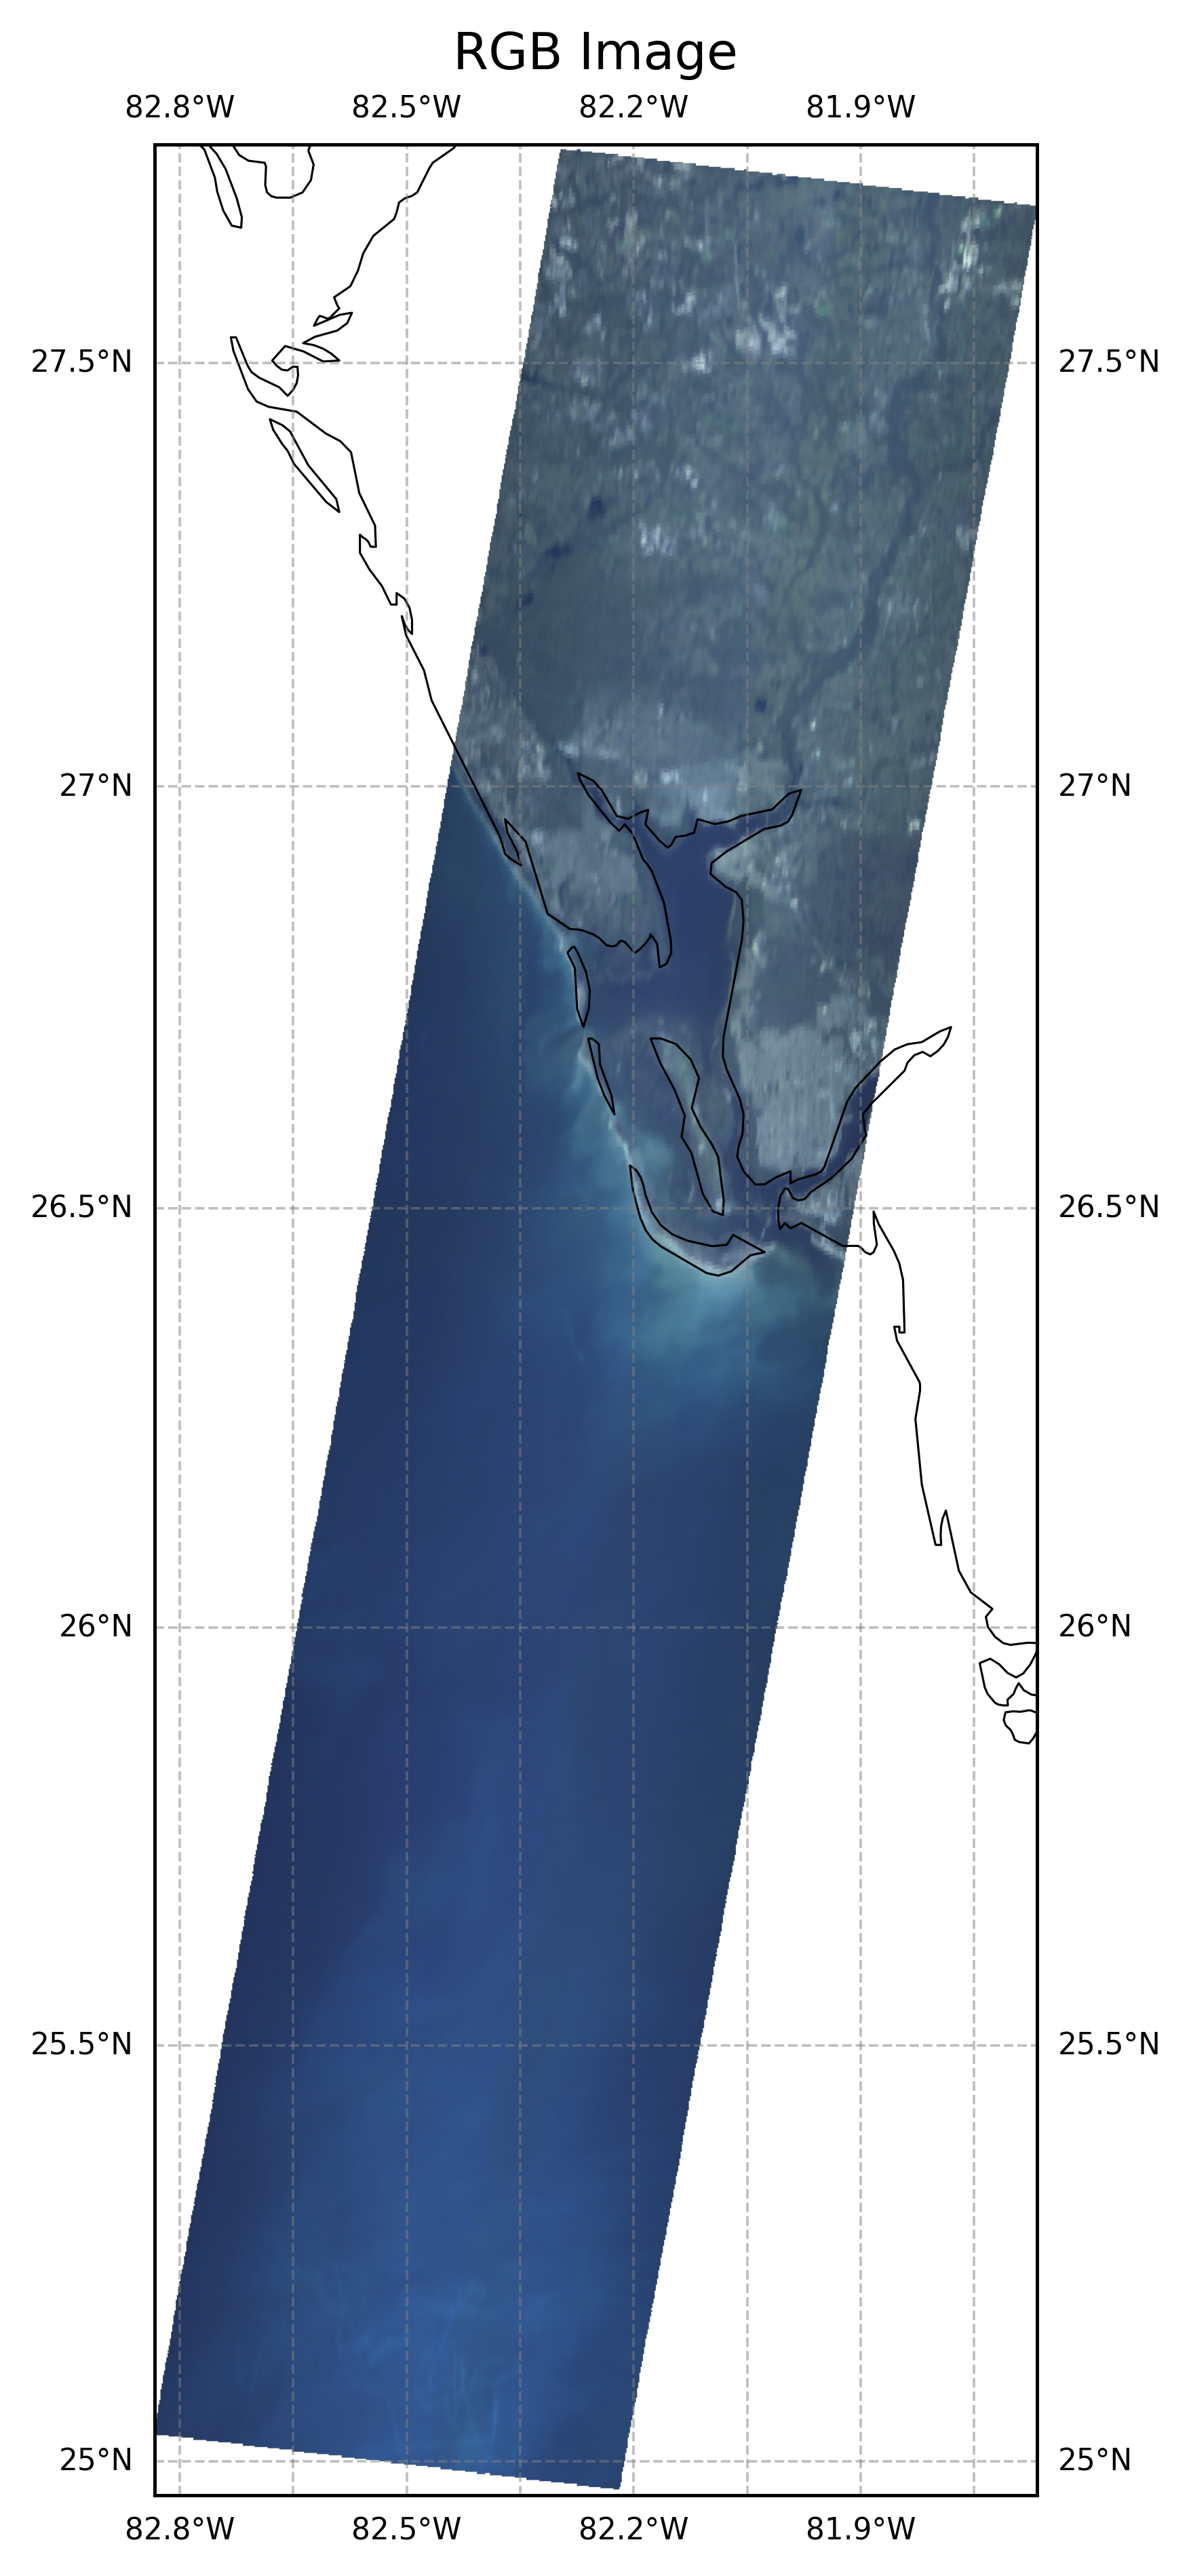

['Rrs_389', 'Rrs_393', 'Rrs_397', 'Rrs_400', 'Rrs_404', 'Rrs_407', 'Rrs_411', 'Rrs_414', 'Rrs_418', 'Rrs_421', 'Rrs_425', 'Rrs_428', 'Rrs_432', 'Rrs_436', 'Rrs_439', 'Rrs_443', 'Rrs_446', 'Rrs_450', 'Rrs_453', 'Rrs_457', 'Rrs_460', 'Rrs_464', 'Rrs_467', 'Rrs_471', 'Rrs_474', 'Rrs_478', 'Rrs_481', 'Rrs_485', 'Rrs_489', 'Rrs_492', 'Rrs_496', 'Rrs_499', 'Rrs_503', 'Rrs_506', 'Rrs_510', 'Rrs_513', 'Rrs_517', 'Rrs_520', 'Rrs_524', 'Rrs_527', 'Rrs_531', 'Rrs_534', 'Rrs_538', 'Rrs_541', 'Rrs_545', 'Rrs_548', 'Rrs_552', 'Rrs_555', 'Rrs_559', 'Rrs_562', 'Rrs_566', 'Rrs_569', 'Rrs_573', 'Rrs_576', 'Rrs_580', 'Rrs_583', 'Rrs_587', 'Rrs_590', 'Rrs_594', 'Rrs_597', 'Rrs_601', 'Rrs_604', 'Rrs_608', 'Rrs_611', 'Rrs_615', 'Rrs_618', 'Rrs_621', 'Rrs_625', 'Rrs_628', 'Rrs_632', 'Rrs_635', 'Rrs_639', 'Rrs_642', 'Rrs_646', 'Rrs_649', 'Rrs_653', 'Rrs_656', 'Rrs_660', 'Rrs_663', 'Rrs_667', 'Rrs_670', 'Rrs_674', 'Rrs_677', 'Rrs_680', 'Rrs_684', 'Rrs_687', 'Rrs_691', 'Rrs_694', 'Rrs_698', 'Rrs_701', 'Rrs_705'

In [1]:
from hypsoreader.plot import write_rgb_map, write_rgb, plot_chlorophyll
from hypsoreader.spectra import print_this
from hypsoreader import Satellite
from hypsoreader.exportfiles import write_h1data_as_NetCDF4, print_nc

hypso_dir = r"/Users/alvaroflores/Documents/florida_2023-01-07_1524Z"
# hypso_dir = r"D:\4th Semester\Code\Datasets\Bundles\Bundle2\florida_2023-01-07_1524Z"
satobj = Satellite(hypso_dir)

write_rgb_map(satobj)

print_this()

import numpy as np
chl_array = np.random.normal(1, 100, size=satobj.spatialDim)

#

In [2]:
write_h1data_as_NetCDF4(satobj, path_to_save=r"/Users/alvaroflores/Desktop/demo.nc")
#print_nc(r"/Users/alvaroflores/Desktop/caca.nc")

{'top_folder_name': '/Users/alvaroflores/Documents/florida_2023-01-07_1524Z', 'folder_name': 'florida_2023-01-07_1524Z', 'flags': '0x00000200', 'camera_ID': 2, 'frame_count': 956, 'exposure': 19.9921, 'fps': 22, 'row_count': 684, 'column_count': 1080, 'sample_divisor': 1, 'bin_factor': 9, 'aoi_x': 428, 'aoi_y': 266, 'gain': 0, 'temp_log_period_ms': 10000, 'unixtime': 1673105079, 'iso_time': '2023-01-07T15:24:39', 'solar_zenith_angle': 58.05193, 'solar_azimuth_angle': 144.01435, 'sat_zenith_angle': 34.60704, 'sat_azimuth_angle': 97.04298, 'background_value': 72, 'x_start': 428, 'x_stop': 1508, 'y_start': 266, 'y_stop': 950, 'exp': 0.019992100000000002, 'image_height': 684, 'image_width': 120, 'im_size': 82080, 'latc': 26.35599, 'lonc': -82.24705, 'lat': array([[27.757711, 27.757607, 27.757504, ..., 27.689606, 27.689508,
        27.689413],
       [27.754818, 27.754715, 27.75461 , ..., 27.686716, 27.686619,
        27.686523],
       [27.751925, 27.751822, 27.751717, ..., 27.683825, 27.6

In [3]:
import netCDF4 as nc
print_nc(nc.Dataset(r"/Users/alvaroflores/Desktop/demo.nc", format="NETCDF4"))

--- GROUP: "/" ---
DIMENSIONS: frames, lines, bands, 
VARIABLES: 
ATTRIBUTES: instrument, institution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, radiometric_file, spectral_file, 
SUB-GROUPS: navigation, products, 

  --- GROUP: "/navigation" ---
  DIMENSIONS: 
  VARIABLES: unixtime, sensor_zenith, sensor_azimuth, solar_zenith, solar_azimuth, latitude, longitude, 
  ATTRIBUTES: iso8601time, 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  VARIABLES: Lt, 
  ATTRIBUTES: 
  SUB-GROUPS: 



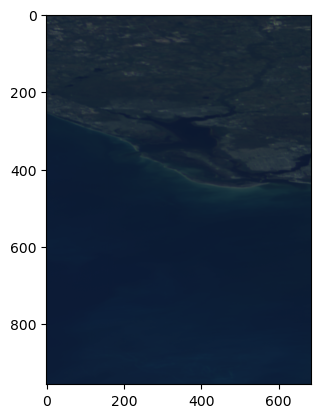

In [4]:
write_rgb(satobj,path_to_save=r"/Users/alvaroflores/Desktop/caca.png")

Chl Range:  [0.01, 100]


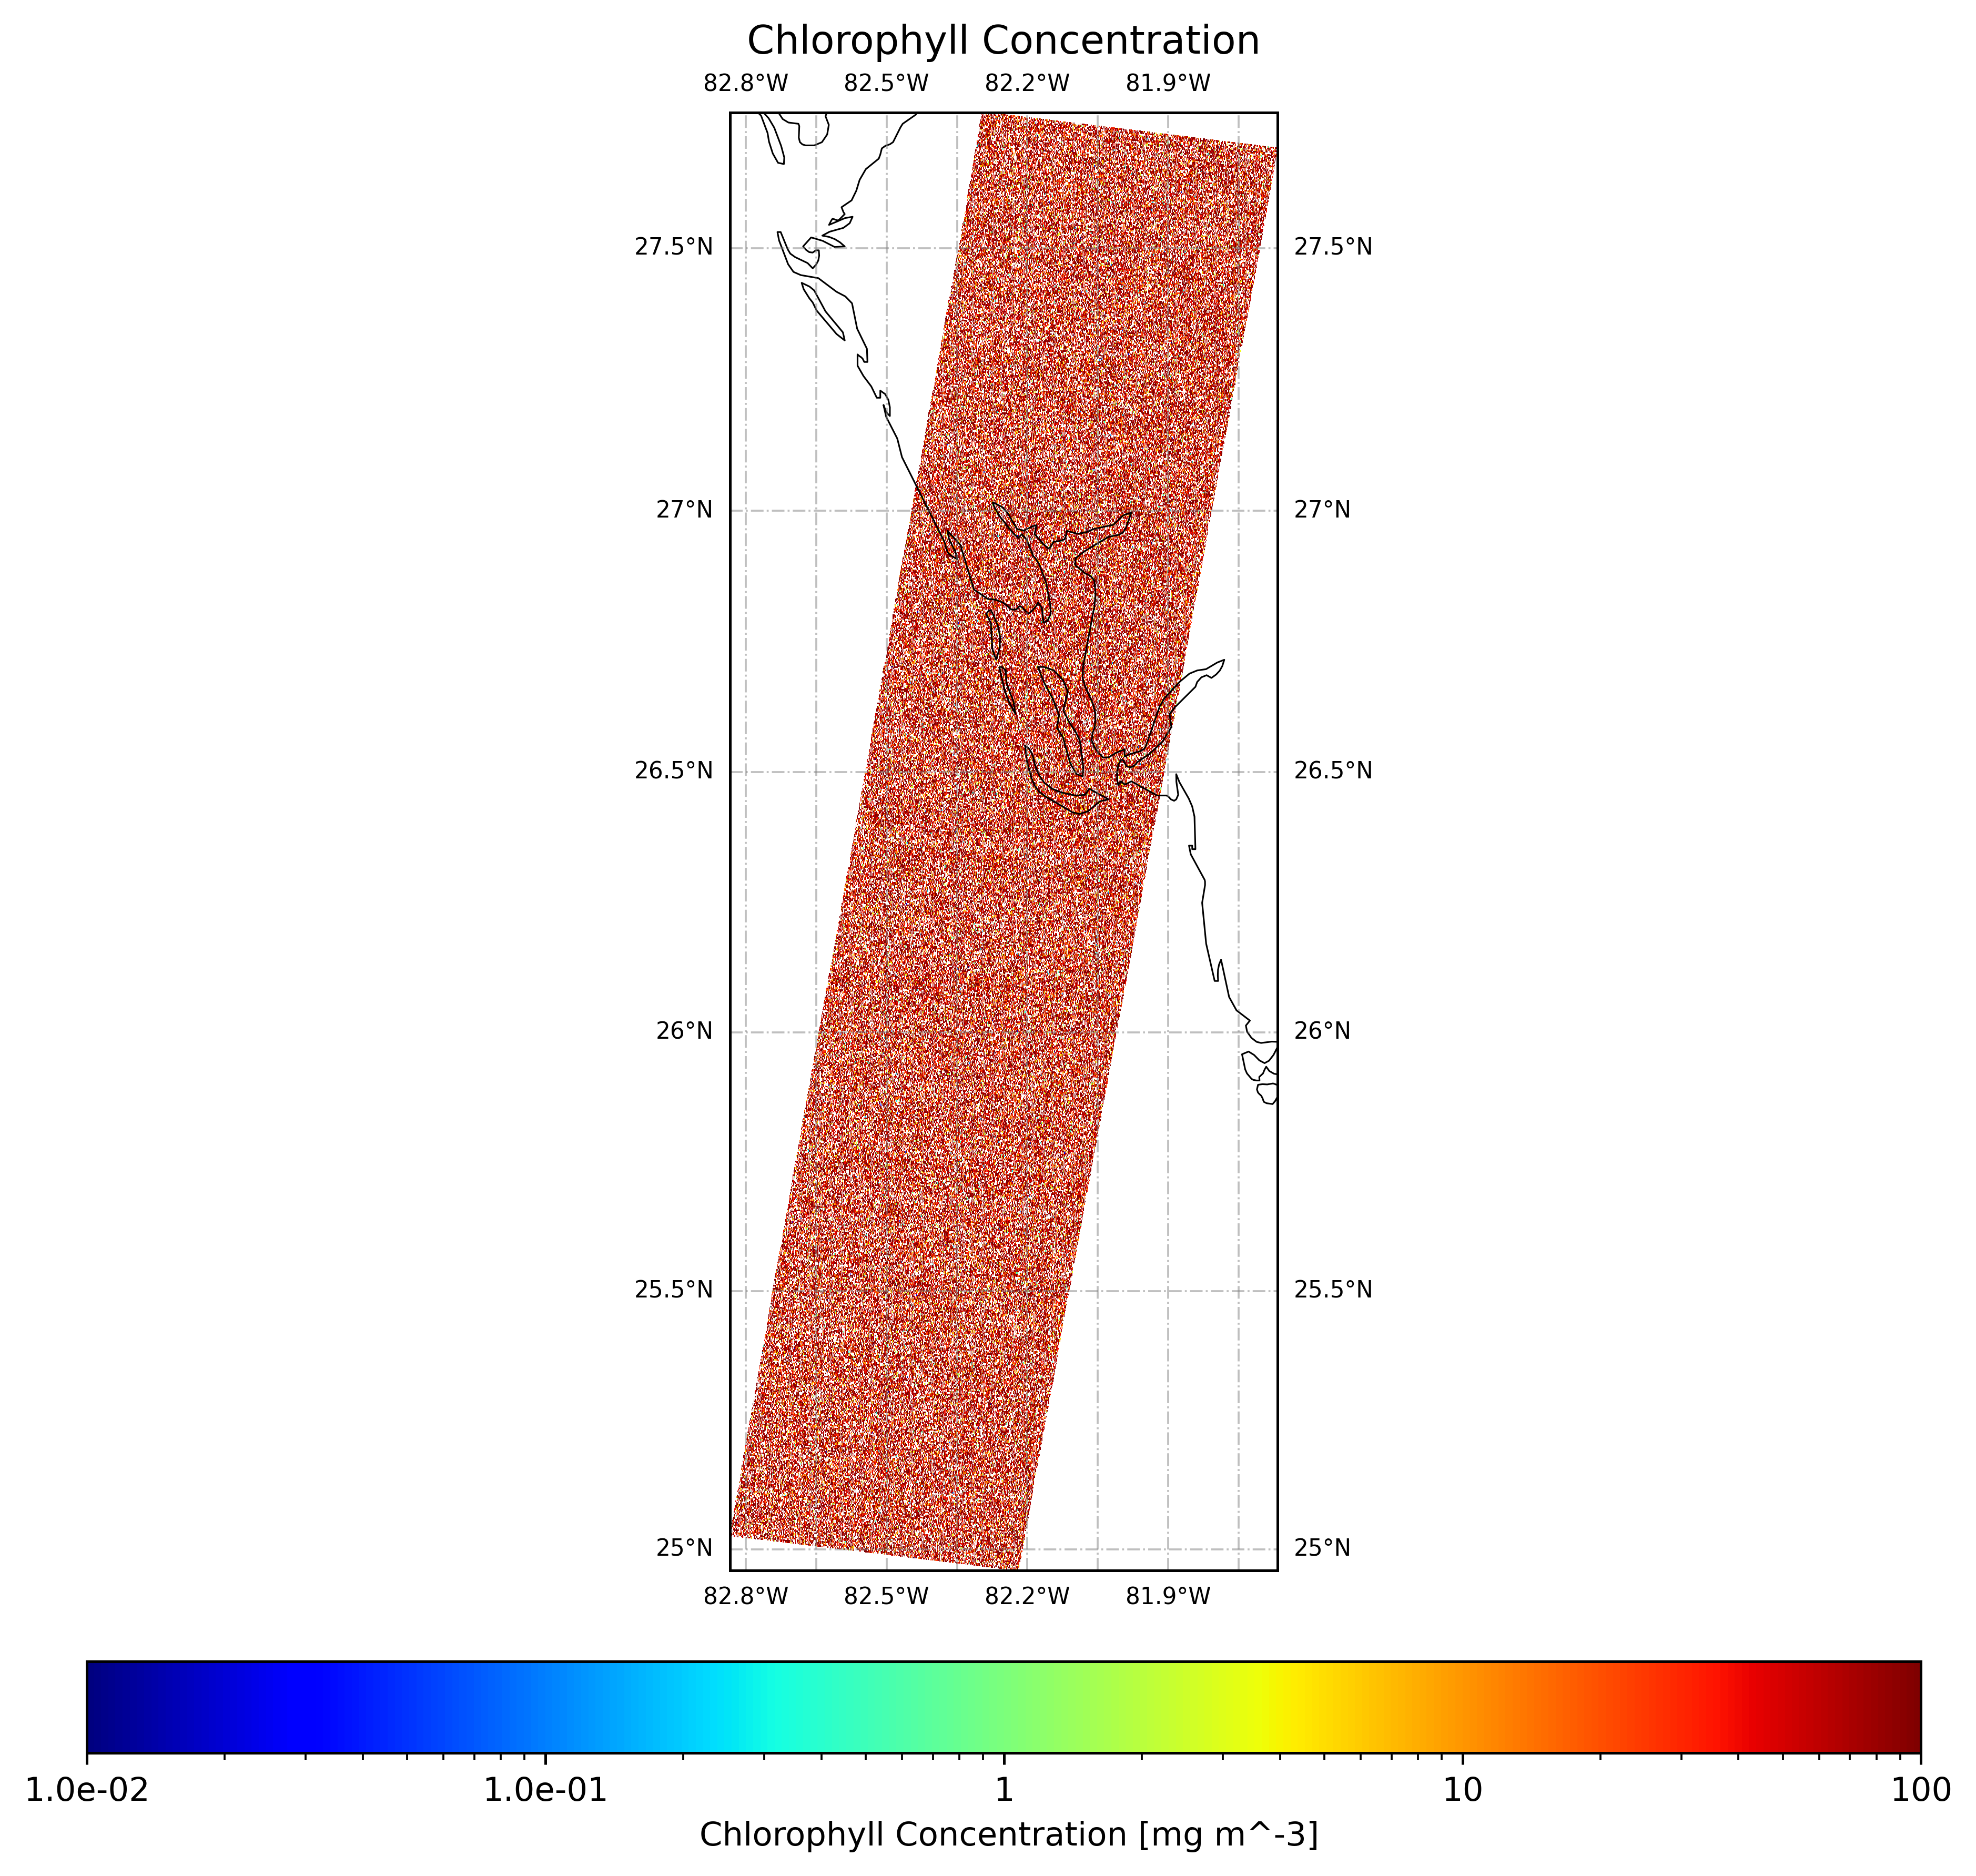

In [5]:
plot_chlorophyll(satobj,chl_array)